In [1]:
import tensorflow as tp
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Dimension of each sample

In [3]:
X_train[0].shape

(28, 28)

In [4]:
len(X_train)


60000

In [5]:
len(X_test)

10000

First Training Image

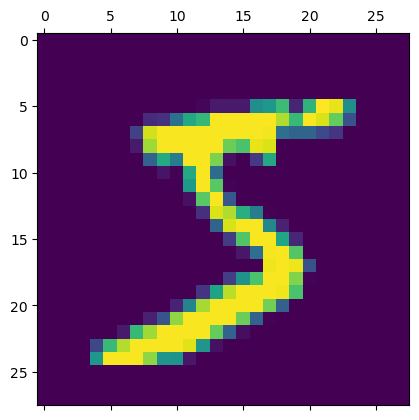

In [6]:
plt.matshow(X_train[0])

Label of the first training image

In [7]:
y_train[0]

5

Scaling

In [8]:
X_train=X_train/225
X_test=X_test/225
X_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Flattening the training set to single dimension

In [9]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_train_flattened.shape


(60000, 784)

In [10]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Using a Single Layer

In [11]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])#output number of nuerons is 10 and activation function is sigmoid
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4528 - accuracy: 0.8792
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3007 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2816 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2722 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2655 - accuracy: 0.9258


Evaluating the model

In [12]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2704 - accuracy: 0.9253


[0.27043619751930237, 0.9253000020980835]

In [13]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([1.87558699e-02, 1.55533300e-07, 4.39659283e-02, 9.65946198e-01,
       1.83444761e-03, 1.10326536e-01, 7.36232380e-07, 9.99800563e-01,
       1.03032030e-01, 6.41381979e-01], dtype=float32)

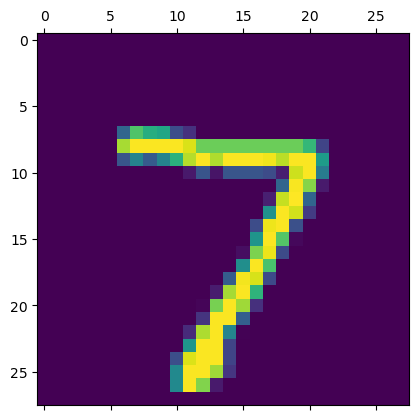

In [14]:
plt.matshow(X_test[0])

In [15]:
np.argmax(y_predicted[0])

7

In [16]:
y_predicted_labels=[np.argmax(i)for i in y_predicted]

Some predicted labels

In [17]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Confusion Matrix

In [18]:
cm=tp.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    2,    0,    4,    6,    2,    4,    1],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   7,    9,  909,   19,   11,    3,   13,   11,   46,    4],
       [   3,    0,   14,  934,    0,   15,    2,   11,   25,    6],
       [   1,    1,    2,    1,  910,    0,   12,    5,   11,   39],
       [   9,    1,    1,   50,   11,  746,   16,    7,   44,    7],
       [  13,    3,    5,    1,    7,   10,  914,    2,    3,    0],
       [   2,    6,   22,    6,    6,    1,    0,  950,    4,   31],
       [   5,    9,    6,   21,    9,   14,    7,    9,  888,    6],
       [   9,    7,    1,   11,   20,    4,    0,   18,   10,  929]])>

Confusion Matrix representation as Heatmap

Text(95.72222222222221, 0.5, 'Truth')

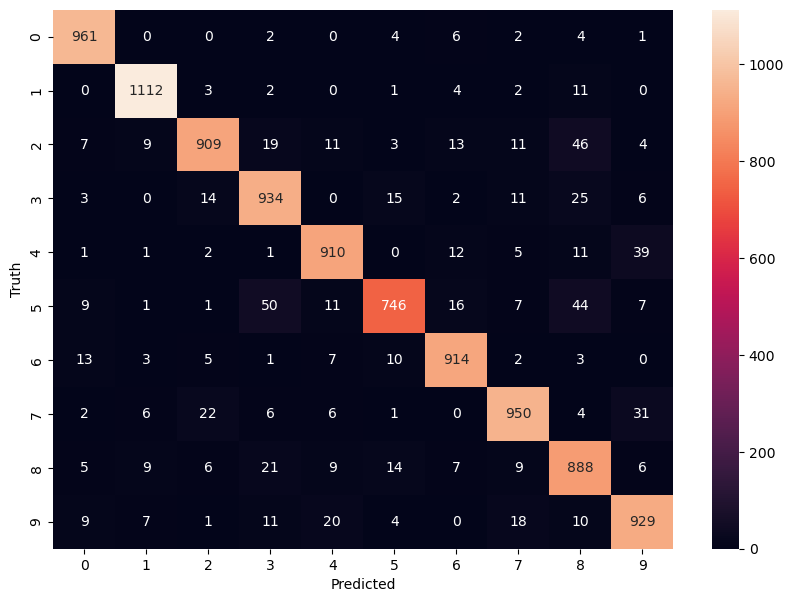

In [19]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
            

# Using hidden layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
 875/1875 [=============>................] - ETA: 1s - loss: 0.3620 - accuracy: 0.8960

In [ ]:
model.evaluate(X_test_flattened,y_test)

Hidden Layer to improve the performance

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tp.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# using Flatten layer so that don't have to call .reshape on input dataset

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

In [ ]:
model.evaluate(X_test,y_test)